In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import matplotlib
#Customize background and pallete colors 
sns.set_style("darkgrid")
#ncol = len(phy_norm.T.columns)
from matplotlib import cm
ncol=21
values = np.linspace(0,1, ncol)
#colors_ = cm.Paired(values)
colors_=cm.tab20(values)

# 1. Generate the metabolic profile 

The coding regions were searched from the obtained contigs using [Prodigal v2.6.3](https://github.com/hyattpd/prodigal/wiki/Gene-Prediction-Modes)using  the -a option, to obtain the translated amino acid sequences of the predicted coding regions and -p meta option. The FASTA files of the resulting sequence contigs have been deposited in the MG-RAST repository under project number mgp80319. 
The peptide amino acid sequences were then scanned against [Pfam-A v30](ftp://ftp.ebi.ac.uk/pub/databases/Pfam/releases/Pfam30.0/Pfam-A.hmm.gz) using [hmmsearch](http://hmmer.org/). 
using the -cut_ga -o /dev/null --tblout options. For more details of the domain annotation see Stage 2 in [MEBS software manual](https://eead-csic-compbio.github.io/metagenome_Pfam_score/manual.v1.pdf)

Example of the annotated sequences using hmmsearch are found in data/matrix_pfams/ directory  


In [20]:
%%bash
head -5 ../data/matrix_pfams/S1.pfam.tab.test.tab

#                                                               --- full sequence ---- --- best 1 domain ---- --- domain number estimation ----
# target name        accession  query name           accession    E-value  score  bias   E-value  score  bias   exp reg clu  ov env dom rep inc description of target
#------------------- ---------- -------------------- ---------- --------- ------ ----- --------- ------ -----   --- --- --- --- --- --- --- --- ---------------------
k127_181276_1        -          1-cysPrx_C           PF10417.8    1.9e-13   54.2   0.3   2.4e-13   53.9   0.3   1.1   1   0   0   1   1   1   1 # 2 # 211 # 1 # ID=180926_1;partial=10;start_type=Edge;rbs_motif=None;rbs_spacer=None;gc_cont=0.695
k127_75540_1         -          1-cysPrx_C           PF10417.8    2.1e-13   54.0   0.1   3.5e-13   53.3   0.1   1.4   1   0   0   1   1   1   1 # 3 # 344 # 1 # ID=75384_1;partial=10;start_type=Edge;rbs_motif=None;rbs_spacer=None;gc_cont=0.649


The abundance profile of each Pfam domain in the metagenomic samples was obtained with the *extract_pfam.pl* which is part of the [MEBS software suite](https://eead-csic-compbio.github.io/metagenome_Pfam_score/). Here is an example of how to run the script with the example data in the case that the main scripts of MEBS are located in the   /usr/local/bin/ directory, otherwise give the complete PATH. 

```bash
extract_pfam.pl -matrixdir ../data/matrix_pfam/ > ../data/matrix_pfams/profile.test.tab
```

In [26]:
%%bash
head ../data/matrix_pfams/profile.test.tab 

# scripts/extract_pfam.pl call:
# -matrixdir /home/val/src/Time_series_mats/data/matrix_pfams
# PARAMS: COUNTPFAMONCEPERSEQ=1

	3	1	2	5	4
PF00198	61	120	42	103	89
PF00244				1	4
PF00389	140	94	58	99	94
PF00725			23		
PF01073			100		


Remove the first lines  by using for example  tail -n +4, and rename the columns to plot. 

In [48]:
%%bash
tail -n +4   ../data/matrix_pfams/profile.test.tab | head


	3	1	2	5	4
PF00198	61	120	42	103	89
PF00244				1	4
PF00389	140	94	58	99	94
PF00725			23		
PF01073			100		
PF01257			54		
PF02737			32		
PF02826	264	220	105	258	274


The real metagenomic profile described is found in the data directory 

In [2]:
pfams=pd.read_table("../data/mats_abundances.sort.tab", index_col=0)
pfams.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
PFAM,,,,,,,,,,,,
PF00001,2,0,0,24,10,10,3,3,10,3,0,9
PF00002,0,0,0,2,1,0,1,0,0,0,0,2
PF00003,9,0,0,10,7,0,6,0,1,4,0,3
PF00004,688,331,800,883,795,782,945,1078,1021,737,949,1199
PF00005,2272,1221,3158,3064,2755,2619,2957,3674,3453,2481,3050,3711


In [3]:
pfams_norm=pfams/pfams.sum()
pfams_norm.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
PFAM,,,,,,,,,,,,
PF00001,0.000010,0.000000,0.000000,0.000091,0.000044,0.000045,0.000011,0.000010,0.000034,0.000014,0.000000,0.000029
PF00002,0.000000,0.000000,0.000000,0.000008,0.000004,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000006
PF00003,0.000047,0.000000,0.000000,0.000038,0.000031,0.000000,0.000022,0.000000,0.000003,0.000018,0.000000,0.000010
PF00004,0.003589,0.003718,0.003477,0.003354,0.003523,0.003557,0.003485,0.003625,0.003503,0.003362,0.003947,0.003889
PF00005,0.011852,0.013716,0.013726,0.011640,0.012209,0.011914,0.010905,0.012353,0.011847,0.011318,0.012687,0.012037


# 2.  Select the pfam domains to plot 

The following PFAMS were selected according to a previous benchmark using the module 2 of MEBS to discover marker genes. The analysis  will be described elsewhere 

In [4]:
markers=pfams.T[[   #Oxygen
                    'PF00067', 'PF00115', 'PF01077', 'PF02560', 'PF03460', 'PF04898', 'PF13442',
                      #Mycosporine Biosynthesis UV Protection 
                    #'PF00501',
                  'PF13193','PF00550','PF00975','PF02655','PF01596','PF01761',
                    #Nitrogen 
                    'PF00174', 'PF00507', 'PF00547', 'PF00699', 
                    'PF02211','PF02633', 'PF05899', 'PF09347',
                    #Iron 
                    'PF14522', 'PF00033', 'PF00034','PF00355',
                    #Sulfur                 
                   'PF12139', 'PF00374','PF01747','PF02662','PF10418','PF13247','PF04358',
                    'PF01058','PF01568','PF09242','PF04879','PF08770',
                    #Sulfur high std     
                    'PF14306','PF03916','PF17179','PF13501','PF02665','PF14697',
                    #Methane
                    'PF01913', 'PF01993','PF02289','PF02741','PF04208' ,'PF04211','PF05440']]
#Sort columns 
markers=markers.T
markers=markers[['S1','S4','S7','S10',
                 'S2','S5','S8','S11',
                'S3','S6','S9','S12']]
#Drop ceros
markers = markers[(markers.T!= 0).any()]
#Normalize data
markers=markers/markers.sum()
markers.head()

,S1,S4,S7,S10,S2,S5,S8,S11,S3,S6,S9,S12
PFAM,,,,,,,,,,,,
PF00067,0.030623,0.059136,0.044039,0.034653,0.010279,0.026952,0.012026,0.008030,0.018784,0.013968,0.029771,0.013086
PF00115,0.078669,0.075071,0.071754,0.082358,0.054332,0.078067,0.060879,0.046764,0.065250,0.050181,0.066794,0.054162
PF01077,0.022703,0.026558,0.027335,0.024302,0.019090,0.024164,0.025930,0.020312,0.019278,0.025867,0.029389,0.029080
PF02560,0.001056,0.001062,0.001139,0.000900,0.000000,0.002788,0.000376,0.000000,0.000989,0.001035,0.001145,0.000364
PF03460,0.015312,0.021246,0.015566,0.018002,0.016153,0.016264,0.013529,0.012282,0.017795,0.014485,0.017557,0.016721


In [62]:
uv=pfams_norm.T[['PF00501',
                  'PF13193','PF00550','PF00975','PF02655','PF01596','PF01761']]
uv=uv.T
uv=uv[['S1','S4','S7','S10',
                 'S2','S5','S8','S11',
                'S3','S6','S9','S12']]

#  3. Plotting only UV related domains 

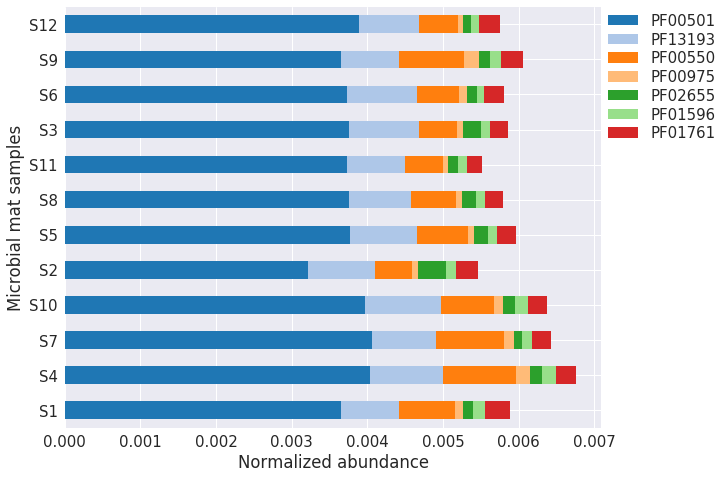

In [66]:
sns.set(font_scale=1.5)
uv.T.plot(kind='barh',stacked=True,color=colors_,figsize=(9,7))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
plt.xlabel("Normalized abundance")
plt.ylabel("Microbial mat samples")
plt.tight_layout()
plt.savefig("../figures/micosporinas.png", bbox_inches='tight',dpi=300) 

# 4. Plot heatmap with cycles related PFAMS

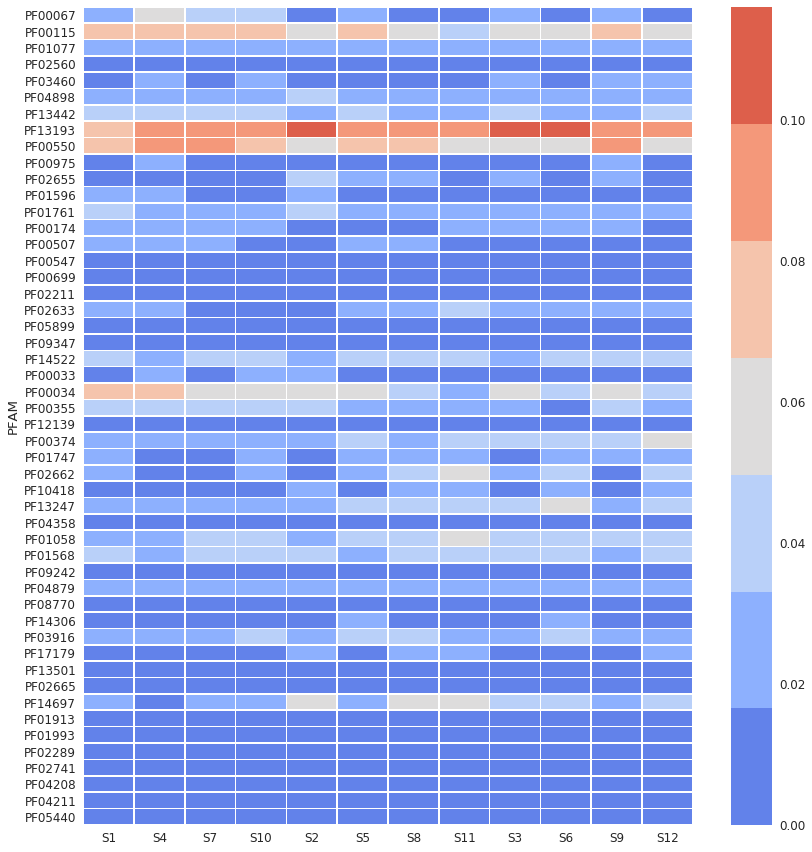

In [5]:
sns.set(font_scale=1.2)
fig = plt.figure(figsize=(12,12))
ax= sns.heatmap(markers, linewidths=0.6,cmap=sns.color_palette("coolwarm", 7))
sns.set(font_scale=1)
#sand = plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
#plt.ylabel("Sulfur Metabolic pathways", weight="bold")
plt.savefig("../figures/Heatmap.cycles.uv.png",bbox_inches='tight', dpi=600)

# 6. Completeness of sulfur cycle using MEBS 

Due to we have curated manually the sulfur cycle, we known which Pfams are involved in certain metabolic Pathways. Therefore we have generated a file containing the PFAMS and the corresponding KO numbers and the name of the pathway involved, see the [tabular file](https://github.com/eead-csic-compbio/metagenome_Pfam_score/blob/master/Advanced_mode/input_sulfur_data/sulfur_score_kegg_list) provide in [MEBS sofware](https://eead-csic-compbio.github.io/metagenome_Pfam_score/)

Assuming that MEBS is already installed, we  compute the completeness of the sulfur cycle in the test_metagenomes directory as an example due to space limits. First we must known the mean size length of the metagenomes. 

```bash
git clone https://github.com/eead-csic-compbio/metagenome_Pfam_score
cd metagenome_Pfam_score
mebsv1.pl -input test_metagenomes/ -type metagenomic -fdr 0.01

# Computing Mean Size Length (MSL) ...
# 4511045.3_metagenome.faa MSL=32 MSLbin=30
# 4440966.3_metagenome.faa MSL=175 MSLbin=150
```

# Added -comp option in MEBS
(april 30 2018) 

Now it is possible to compute the completeness directly from the main mebsv1.pl score 


```bash
perl mebsv1.pl -input test_metagenomes/ -type genomic -comp > test_metagenomes.comp.tsv 
```

Have a look of the file generated with the above command 

In [39]:
test_met=pd.read_table( "../data/test_metagenomes.comp.tsv", index_col=0) 
test_met.head()

,sulfur,carbon,oxygen,iron,nitrogen,sulfur_<comp>,sulfur_1,sulfur_2,sulfur_3,sulfur_4,...,sulfur_20,sulfur_21,sulfur_22,sulfur_23,sulfur_24,sulfur_25,sulfur_26,sulfur_27,sulfur_28,sulfur_29
4511045.3_metagenome.faa,-2.295,1.790,5.412,2.745,13.024,63.3,44.4,20.0,100.0,29.4,...,28.6,0.0,57.1,81.8,100.0,100.0,100.0,100.0,75.0,25.0
4440966.3_metagenome.faa,5.817*,8.804,1.178,4.579,11.697,69.1,55.6,40.0,100.0,52.9,...,28.6,0.0,42.9,72.7,100.0,100.0,100.0,100.0,100.0,66.7


The number of the ids belongs to the following pathways 


In [40]:
sulfur_paths=pd.read_table("../data/sulfur_completeness.ids",index_col=0,sep="\t")
sulfur_paths.T

id,sulfur_1,sulfur_2,sulfur_3,sulfur_4,sulfur_5,sulfur_6,sulfur_7,sulfur_8,sulfur_9,sulfur_10,...,sulfur_19,sulfur_20,sulfur_21,sulfur_22,sulfur_23,sulfur_24,sulfur_25,sulfur_27,sulfur_28,sulfur_29
Path_description,Sulfite oxidation,Thiosulfate oxidation,Tetrathionate oxidation,Tetrathionate reduction,Sulfate reduction DS,Elemental sulfur reduction,Thiosulfate disproportion,Carbon disulfide oxidation,Alkanesulfonate degradation,Sulfate reduction Assimilative,...,Suloacetaldehyde oxidation,Elemental sulfur oxidation,Elemental sulfur disproportion,Methanesulfonate oxidation,Taurine oxidation,DMS methanogenesis,MTP methanogesis,tMethanethiol methanogenesis,SQDG biosynthesis,Marker genes


Parse file according to the desired pathways to plot

In [41]:
concat=pd.concat([sulfur_paths.T, test_met],axis=0)
concat

,carbon,iron,nitrogen,oxygen,sulfur,sulfur_1,sulfur_10,sulfur_11,sulfur_12,sulfur_13,...,sulfur_28,sulfur_29,sulfur_3,sulfur_4,sulfur_5,sulfur_6,sulfur_7,sulfur_8,sulfur_9,sulfur_<comp>
Path_description,NaN,NaN,NaN,NaN,NaN,Sulfite oxidation,Sulfate reduction Assimilative,Sulfide oxidation,Cysteate oxidation,Dimethylsulfone oxidation,...,SQDG biosynthesis,Marker genes,Tetrathionate oxidation,Tetrathionate reduction,Sulfate reduction DS,Elemental sulfur reduction,Thiosulfate disproportion,Carbon disulfide oxidation,Alkanesulfonate degradation,NaN
4511045.3_metagenome.faa,1.790,2.745,13.024,5.412,-2.295,44.4,50,24.1,100,66.7,...,75,25,100,29.4,25,25,33.3,100,100,63.3
4440966.3_metagenome.faa,8.804,4.579,11.697,1.178,5.817*,55.6,45,34.5,100,100,...,100,66.7,100,52.9,50,45,77.8,0,100,69.1


Parsing the above output to plot only the completeness of sulfur cycle

In [43]:
comp=pd.read_table("../data/completeness.parse.tab",index_col=0)
comp.head()

,Sulfite oxidation,Thiosulfate oxidation,Tetrathionate oxidation,Tetrathionate reduction,Sulfate reduction DS,Elemental sulfur reduction,Thiosulfate disproportion,Alkanesulfonate degradation,Sulfate reduction Assimilative,Sulfide oxidation,...,Sulfolactate oxidation,DMS oxidation,DMSP oxidation,MTP oxidation,Suloacetaldehyde oxidation,Elemental sulfur oxidation,Elemental sulfur disproportion,Methanesulfonate oxidation,Taurine oxidation,Marker genes
s01_ANOV12,100,70,100,76.5,75,60,77.8,100,65,72.4,...,71.4,62.5,100.0,100,85.7,71.4,0,85.7,81.8,100.0
s02_BNOV12,100,70,100,76.5,75,60,77.8,100,65,69.0,...,71.4,68.8,100.0,100,85.7,57.1,0,85.7,81.8,100.0
s03_CNOV12,100,80,100,76.5,75,60,77.8,100,65,75.9,...,71.4,81.2,100.0,100,85.7,71.4,100,85.7,81.8,100.0
s04_AMAY13,100,70,100,76.5,75,60,77.8,100,65,69.0,...,71.4,81.2,100.0,100,85.7,57.1,0,85.7,81.8,100.0
s05_BMAY13,100,80,100,76.5,75,60,77.8,100,70,69.0,...,71.4,81.2,100.0,100,85.7,71.4,100,85.7,81.8,100.0


In [44]:
comp=comp.T
#To plot in time order for each site 
sorted_columns = ["s01_ANOV12", "s04_AMAY13", "s07_AOCT13", "s10_AMAY14",
                 "s02_BNOV12", "s05_BMAY13", "s08_BOCT13", "s11_BMAY14",
                 "s03_CNOV12", "s06_CMAY13", "s09_COCT13", "s12_CMAY14"]

# 8. Plot completeness (heatmap) 

/usr/local/lib/python3.5/dist-packages/matplotlib-2.0.2+4432.g411fbf6-py3.5-linux-x86_64.egg/matplotlib/figure.py:1988: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


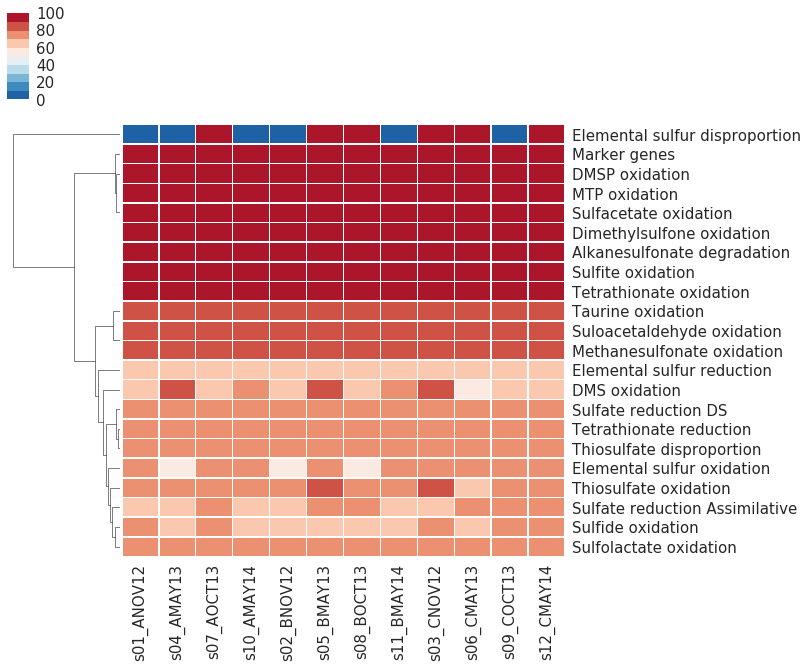

In [89]:
sns.set(font_scale=1.5)
axs = sns.clustermap(comp[sorted_columns], col_cluster=False, linewidths=0.6,cmap=sns.color_palette("RdBu_r", 10))
plt.tight_layout()
plt.savefig("../figures/Completeness.png", bbox_inches='tight', dpi=600)